In [73]:
import numpy as np
#!pip install cupy
#import cupy as np 
import matplotlib.pyplot as plt
from tqdm import tqdm

In [74]:
def zeroth_order_terms(V, alpha, beta, L, R, z1, z2):
    c10a = (1/z1) * ((1 - alpha) * L + alpha * R)
    c20a = (-z1/z2) * c10a
    c10b = (1/z1) * ((1 - beta) * L + beta * R)
    c20b = (-z1/z2) * c10b
    phi0a = V * (np.log(((1 - alpha) * L + alpha * R)) - np.log(R)) / (np.log(L) - np.log(R))
    phi0b = V * (np.log(((1 - beta)  * L + beta * R)) - np.log(R)) / (np.log(L) - np.log(R))
    y0 = ((1.0 / ((z1 - z2) * (L - R))) * np.log(((1 - alpha) * L + alpha * R) / ((1 - beta) * L + beta * R)))
    J10 = ((L - R) / (z1 * (np.log(L) - np.log(R)))) * (z1 * V + np.log(L) - np.log(R))
    J20 = ((R - L) / (z2 * (np.log(L) - np.log(R)))) * (z2 * V + np.log(L) - np.log(R))
    return c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20

In [75]:
def first_order_terms(V, alpha, beta, L, R, z1, z2):
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
    c11a = (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21a = (z1 * alpha * (phi0b - phi0a) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c11b = (z2 * (1 - beta) * (phi0a - phi0b) / (z1 - z2)) - (1 / (2 * (z1 - z2)))
    c21b = (z1 * (1 - beta) * (phi0a - phi0b) / (z2 - z1)) - (1 / (2 * (z2 - z1)))
    c1L  = L / z1
    c1R  = R / z1
    T0   =   J10 +  J20

    A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (np.log(L) - np.log(R)))
    B = ( np.log(((1 - beta) * L + beta * R)) - np.log(((1 - alpha) * L + alpha * R))  ) / A

    lambda_val = V / (np.log(L) - np.log(R))
    phi1a = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (np.log(c1L) - np.log(c10a))) / (z1 * (z1 - z2) * c10a * c10b * (np.log(c1R) - np.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10a)) + (lambda_val * ((z2 * alpha * (phi0b - phi0a)) / ((z1 - z2) * c10a) ) )
    phi1b = ((1 + z1 * lambda_val) * (1 + z2 * lambda_val) * (c10b - c10a) * (np.log(c1R) - np.log(c10b))) / (z1 * (z1 - z2) * c10a * c10b * (np.log(c1R) - np.log(c1L))) \
                  + (1 / (2 * z1 * (z1 - z2) * c10b)) + (lambda_val * ((z2 * (1 - beta) * (phi0a - phi0b)) / ((z1 - z2) * c10b) ) )
    y1 = (((1 - beta) * c1L + alpha * c1R) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * c10a * c10b) \
           + ((np.log(c10a) - np.log(c10b)) * (phi0a - phi0b)) / (z1 * (z1 - z2) * T0 * (c1L - c1R)) \
            - (((z2 * J10 + z1 * J20) * (c10a - c10b)) / (z1 ** 2 * z2 * (z1 - z2) * T0 ** 2 * c10a * c10b))
    J11 = ( (A * (z2 * (1 - B) * V + np.log(L) - np.log(R))) / ((z1 - z2) * (np.log(L) - np.log(R))**2) ) * (z1 * V + np.log(L) - np.log(R))
    J21 = ( (A * (z1 * (1 - B) * V + np.log(L) - np.log(R))) / ((z2 - z1) * (np.log(L) - np.log(R))**2) ) * (z2 * V + np.log(L) - np.log(R))


    return c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21

In [76]:
def calculate_voltage_ranges(L, R):
    alpha = 1/3
    beta = 2/3
    z1 = 1
    z2 = -1

    A = -((beta - alpha) * (L - R) ** 2) / (((1 - alpha) * L + alpha * R) * ((1 - beta) * L + beta * R) * (np.log(L) - np.log(R)))
    B = ( np.log(((1 - beta) * L + beta * R)) - np.log(((1 - alpha) * L + alpha * R))  ) / A

    Vq1 = (np.log(R) - np.log(L)) / (z2 * (1 - B))
    Vq2 = (np.log(R) - np.log(L)) / (z1 * (1 - B))

    Vqmin = np.min([Vq1, Vq2])
    Vqmax = np.max([Vq1, Vq2])

    V1_range = np.linspace(Vqmin-80, Vqmin, 200)
    V2_range = np.linspace(Vqmin, Vqmax, 200)
    V3_range = np.linspace(Vqmax, Vqmax+80, 200)

    return alpha, beta, z1, z2, V1_range, V2_range, V3_range

In [77]:
 # Define the second order terms
def second_order_terms(V, alpha, beta, L, R, z1, z2):
    # Constants
    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V, alpha, beta, L, R, z1, z2)
    H1 = 1.0
    phiL = V
    phiR = 0.0
    c1L  = L / z1
    c1R  = R / z1
    T0   = J10 +  J20
    T1   = J11 +  J21
    I1   = z1*J11 + z2*J21

    # Intermediate calculations
    A1 = -z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
    B1 = z1 * (c10b - c1R) / ((1 - beta) * H1 * (np.log(c10b) - np.log(c1R)))

    A2_1 = (z1 * z2 * (phi1a - phi1b) / ((z1 - z2) * H1)) * (
    (1 / z1) + (V - phi0a) / (np.log(c1L) - np.log(c10a)) - (V - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a) )

    A2_2 = (z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a))) ) * (
    z1 * z2 * alpha * (phi0b - phi0a) / (2 * (z1 * (z1 - z2) * c10a)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10a)**2))

    A2_3 = (z1 * z2 * (phi0a - phi0b) / (H1 * (np.log(c1L) - np.log(c10a)) * (z1 - z2)**2) ) * (
    (z1 - z2) * phi1a - ((z1 - z2) * (c1L - c10a) * phi1a / ((np.log(c1L) - np.log(c10a)) * c10a)) - 1 / (2 * z1 * c10a)
    + (c1L - c10a) / (2 * z1 * (np.log(c1L) - np.log(c10a)) * c10a**2)
    + z2 * (c11a + c21a) * (V - phi0a) * (c1L + c10a) / (2 * (np.log(c1L) - np.log(c10a)) * c10a**2) )

    A2 = A2_1 - A2_2 - A2_3

    # B2:
    B2_1 = (z1 * z2 * (phi1a - phi1b) / ((z1 - z2) * H1)) * (
    (1 / z1) + phi0b / (np.log(c10b) - np.log(c1R)) - phi0b * (c10b - c1R) / ((np.log(c10b) - np.log(c1R))**2 * c10b))

    B2_2 = (z1 * (c10b - c1R) / ((1 - beta) * H1 * (np.log(c10b) - np.log(c1R)))) * (
    z1 * z2 * (1 - beta) * (phi0a - phi0b) / (2 * (z1 * (z1 - z2) * c10b)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10b)**2))

    B2_3 = (z1 * z2 * (phi0b - phi0a) / (H1 * (np.log(c10b) - np.log(c1R)) * (z1 - z2)**2)) * (
    (z1 - z2) * phi1b - (z1 - z2) * (c10b - c1R) * phi1b / ((np.log(c10b) - np.log(c1R)) * c10b) - (1 / (2 * z1 * c10b))
    + (c10b - c1R) / (2 * z1 * (np.log(c10b) - np.log(c1R)) * c10b**2)
    + z2 * (c11b + c21b) * phi0b * (c1R + c10b) / (2 * (np.log(c10b) - np.log(c1R)) * c10b**2))


    B2 = B2_1 + B2_2 - B2_3

    # C:
    C_1 = -(z1**2 * c11a + z2**2 * c21a) / (2 * (z1 * (z1 - z2) * c10a)**2)
    C_2 = (z1**2 * c11b + z2**2 * c21b) / (2 * (z1 * (z1 - z2) * c10b)**2)
    C_3 = (z1 + z2) * ((c10b)**2 - (c10a)**2) / (12 * (z1 * (z1 - z2) * c10a * c10b)**2)
    C_4 = -I1 * y1

    C_5 = ((z1 - z2) * (L - R) * V * y1) / (H1 * (np.log(L) - np.log(R)) * c10a) * (
    (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - (c10a * (phi0a - phi0b) / (H1 * T0)) - 1 / (z1 - z2))

    C_6 = z2 * V * (1 / (c10a)**2 - 1 / (c10b)**2)/ (2 * z1 * (z1 - z2)**2 * (np.log(L) - np.log(R)))

    C_7 = z1 * z2 * (phi1a - phi1b) * V * ((1 / (z1 * (z1 - z2))) * (alpha / c10a + (1 - beta) / c10b) + y0 / H1)/ (np.log(L) - np.log(R))

    C_8 = -((z1**2 * z2**2 * V) / (2 * (np.log(L) - np.log(R)) ) ) * (T0 * y1 + T1 * y0)**2

    C_9 = (z1 * z2 * V * (phi0a - phi0b) * y0 / (H1 * c10a * (np.log(L) - np.log(R))) ) * (
        z2 * alpha * (phi0b - phi0a) / (z1 - z2) - (1 / (z1 - z2)) )

    C_10 = (J11 * V / (z1 * T0 * (np.log(L) - np.log(R))) ) * (1 / c10b - 1 / c10a)

    C_11 = (J10 * (phi0a - phi0b) * V) * (1 / c10b - 1 / c10a) / (z1 * T0**2 * H1 * (np.log(L) - np.log(R)))

    C = C_1 + C_2 + C_3 + C_4 + C_5 + C_6 + C_7 + C_8 + C_9 + C_10 + C_11


    # Calculate c12a, c22a, c12b, c22b
    c12a = -(z1 + 4 * z2) / (24 * z1 * (z1 - z2)**2 * c10a) - ((phi1a - phi1b) * alpha * z2) / (z1 - z2)
    c22a = (4 * z1 + z2) / (24 * z1 * (z1 - z2)**2 * c10a) + ((phi1a - phi1b) * alpha * z1) / (z1 - z2)
    c12b = -(z1 + 4 * z2) / (24 * z1 * (z1 - z2)**2 * c10b) + ((phi1a - phi1b) * (1 - beta) * z2) / (z1 - z2)
    c22b = (4 * z1 + z2) / (24 * z1 * (z1 - z2)**2 * c10b) - ((phi1a - phi1b) * (1 - beta) * z1) / (z1 - z2)

    # Calculate phi2a, phi2b
    phi2a = (B1 * C - (z1 - z2) * y0 * B1 * A2 - z2 * y0 * B1 * (phi1b - phi1a) / H1 +
              B2 - A2) / (A1 - B1 + (z1 - z2) * y0 * A1 * B1)
    phi2b = (1 - (z1 - z2) * y0 * A1) * phi2a + C - (z1 - z2) * y0 * A2 - z2 * y0 * (phi1b - phi1a) / H1

    # Calculate y2
    y2_1 = ((phi1a - phi1b) * y0 / (H1 * T0)) - y1 / c10a * (
    (z2 * alpha * (phi0b - phi0a) / (z1 - z2)) - c10a * (phi0a - phi0b) / (H1 * T0) - (1 / (z1 - z2)) )

    y2_2 = (1 / (2 * z1**2 * (z1 - z2)**2 * T0)) * (1 / (c10a)**2 - 1 / (c10b)**2)

    y2_3 = ((phi1a - phi1b) / (z1 * (z1 - z2) * T0)) * (alpha / c10a + (1 - beta) / c10b)

    y2_4 = (-z1 * z2 / (2 * T0)) * (T0 * y1 + T1 * y0)**2

    y2_5 = (phi0a - phi0b) * y0 / (H1 * T0 * c10a) * (
        z2 * alpha * (phi0b - phi0a) / (z1 - z2) - 1 / (z1 - z2) )

    y2_6 = J11 / (z1**2 * z2 * T0**2) * (1 / c10b - 1 / c10a)

    y2_7 = J10 * (phi0a - phi0b) / (z1**2 * z2 * T0**3 * H1) * (1 / c10b - 1 / c10a)

    y2 = y2_1 + y2_2 + y2_3 + y2_4 + y2_5 + y2_6 + y2_7





    # Calculate J12 and J22:
    Jcommon_1 = (z1 * z2 * (phi1a - phi1b) / (H1 * (z1 - z2)))
    Jcommon_2 = z1 * (c1L - c10a) / (alpha * H1 * (np.log(c1L) - np.log(c10a)))
    Jcommon_3 = (phi2a + z1 * z2 * alpha * (phi0b - phi0a) / (2 * (z1 * (z1 - z2) * c10a)**2) - (z1 + z2) / (6 * (z1 * (z1 - z2) * c10a)**2))
    Jcommon_4 = z1 * z2 * (phi0a - phi0b) / (H1 * (np.log(c1L) - np.log(c10a)) * (z1 - z2)**2)
    Jcommon_5 = (z1 - z2) * phi1a - ( (z1 - z2) * (c1L - c10a) * phi1a / ((np.log(c1L) - np.log(c10a)) * c10a) ) - 1 / (2 * z1 * c10a) + (c1L - c10a) / (2 * z1 * (np.log(c1L) - np.log(c10a)) * (c10a**2)) + z2 * (c11a + c21a) * (phiL - phi0a) * (c1L + c10a) / (2 * (np.log(c1L) - np.log(c10a)) * (c10a**2))
    
    J_term2 = Jcommon_2 * Jcommon_3
    J_term3 = Jcommon_4 * Jcommon_5
    
    #
    J_term11 = (1 / z1) + (phiL - phi0a) / (np.log(c1L) - np.log(c10a)) - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a)
    J_term12 = (1 / z2) + (phiL - phi0a) / (np.log(c1L) - np.log(c10a)) - (phiL - phi0a) * (c1L - c10a) / ((np.log(c1L) - np.log(c10a))**2 * c10a)
    
    
    J12_term1 = Jcommon_1 * J_term11

    J12 = J12_term1 - J_term2 - J_term3

    # Calculate J22:
    J22_term1 = - Jcommon_1 * J_term12

    J22 = J22_term1 + J_term2 + J_term3 


    return c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22


#result = second_order_terms(V, alpha, beta, L, R, z1, z2)
#print(result)


In [78]:
# Identify consecutive indices and keep one element per consecutive sequence with minimum absolute value
def keep_min_abs_per_consecutive(indices, values):
    result_indices = []
    i = 0
    while i < len(indices):
        j = i + 1
        while j < len(indices) and indices[j] == indices[j - 1] + 1:
            j += 1

        # Find the index with minimum absolute value in the consecutive sequence
        min_abs_index = min(range(i, j), key=lambda k: abs(values[indices[k]]))
        result_indices.append(indices[min_abs_index])
        i = j

    return np.array(result_indices)

In [79]:
def remove_close_roots(V_zero, V_range,  distance_threshold=0.3):
    sorted_indices = np.searchsorted(V_range, V_zero)
    #sorted_roots = V_zero[sorted_indices]

    result_indices = [sorted_indices[0]]
    
    for i in range(1, len(sorted_indices)):
        distance = V_range[sorted_indices[i]] - V_range[result_indices[-1]]

        if distance >= distance_threshold:
            result_indices.append(sorted_indices[i])
            #print('1=', V_range[sorted_roots[i]])

        elif distance < distance_threshold and abs(V_range[sorted_indices[i]]) < abs(V_range[result_indices[-1]]):
            result_indices.pop()  # Remove the last added index
            result_indices.append(sorted_indices[i])
            #print('2=', x_values[sorted_roots[i]])

        #else:
         #       result_indices.append(sorted_indices[-1])
                #print('3=', x_values[sorted_roots[-1]])

    return V_range[np.array(result_indices)]

In [80]:
def remove_same_sign_points(V_zero, V_range, J1_prd2, J2_prd2):
    new_V_zero = []

    LHS_index = np.abs(V_range - (V_zero[0] - 10) ).argmin()
    mid_0_1 = (V_zero[0] + V_zero[1]) / 2
    mid_0_1_index = np.abs(V_range - mid_0_1).argmin()
    sign_J1_prd2_LHS = np.sign(J1_prd2[LHS_index])
    sign_J2_prd2_LHS = np.sign(J2_prd2[LHS_index])
    sign_J1_prd2_0_1 = np.sign(J1_prd2[mid_0_1_index])
    sign_J2_prd2_0_1 = np.sign(J2_prd2[mid_0_1_index])

    if sign_J1_prd2_LHS != sign_J1_prd2_0_1 or sign_J2_prd2_LHS != sign_J2_prd2_0_1:
        new_V_zero.append(V_zero[0])


    for i in range(1, len(V_zero) - 1):
        midpoint_prev = (V_zero[i - 1] + V_zero[i]) / 2
        midpoint_next = (V_zero[i + 1] + V_zero[i]) / 2
        mid_index_prev = np.abs(V_range - midpoint_prev).argmin()
        mid_index_next = np.abs(V_range - midpoint_next).argmin()

        # Append the signs for the current midpoint
        sign_J1_prd2_prev = np.sign(J1_prd2[mid_index_prev])
        sign_J2_prd2_prev = np.sign(J2_prd2[mid_index_prev])
        sign_J1_prd2_next = np.sign(J1_prd2[mid_index_next])
        sign_J2_prd2_next = np.sign(J2_prd2[mid_index_next])

        threshold_value = 5 * 1e-1

        if (
            sign_J1_prd2_prev != sign_J1_prd2_next or
            sign_J2_prd2_prev != sign_J2_prd2_next
            ) and (
            abs(J1_prd2[mid_index_prev]) > threshold_value and
            abs(J2_prd2[mid_index_prev]) > threshold_value and
            abs(J1_prd2[mid_index_next]) > threshold_value and
            abs(J2_prd2[mid_index_next]) > threshold_value
            ):
            new_V_zero.append(V_zero[i])



    RHS_index = np.abs(V_range - (V_zero[-1] + 10) ).argmin()
    sign_J1_prd2_RHS = np.sign(J1_prd2[RHS_index])
    sign_J2_prd2_RHS = np.sign(J2_prd2[RHS_index])
    if sign_J1_prd2_next != sign_J1_prd2_RHS or sign_J2_prd2_next != sign_J2_prd2_RHS:
        new_V_zero.append(V_zero[-1])


    return np.array(new_V_zero)


In [81]:
# Define the ranges for L and R
L_values = np.linspace(0.05, 1.95, 20)
#L_values = [0.05,  0.95, 1.05,  2]
R = 1
Q = 0.01

# Initialize matrices for signs_J1 and signs_J2
lenL = len(L_values)
num_subintervals = 20

signs_J1 = np.zeros((lenL, num_subintervals))
signs_J2 = np.zeros((lenL, num_subintervals))
V_critic = np.zeros((lenL, num_subintervals))

# Initialize min_V and max_V for plots
min_V = 60  # Initialize to a positive large value
max_V = -60  # Initialize to a engative large value

for i, L in tqdm(enumerate(L_values), total=len(L_values), desc='Processing time'):
    print('L = ', L)
    V_range = np.linspace(-100, 100, int(1e7))  # Adjust the number of points as needed
    alpha, beta, z1, z2, V1_range, V2_range, V3_range = calculate_voltage_ranges(L, R)


    c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(V_range, alpha, beta, L, R, z1, z2)
    c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(V_range, alpha, beta, L, R, z1, z2)
    J1_prd2 =  J10 * J11 * J12
    J2_prd2 =  J20 * J21 * J22

    # Find indices of values very close to zero in J1_prd2 and J2_prd2
    epsilon =  1  # Adjust this value as needed
    zero_indices1 = np.where(np.isclose(J1_prd2, 0., atol=epsilon))[0]
    zero_indices2 = np.where(np.isclose(J2_prd2, 0., atol=epsilon))[0]


    # Keep one element per consecutive sequence in zero_indices1 and zero_indices2
    zero_indices1 = keep_min_abs_per_consecutive(zero_indices1, J1_prd2)
    zero_indices2 = keep_min_abs_per_consecutive(zero_indices2, J2_prd2)

    # Get corresponding values of V_range for zero values in J1_prd2 and J2_prd2
    V_zero_values1 = V_range[zero_indices1]
    V_zero_values2 = V_range[zero_indices2]
    #print('V1=', V_zero_values1)
    #print('V2=', V_zero_values2)

    # Combine the zero values
    V_combined = np.concatenate([V_zero_values1, V_zero_values2])

    # Rearrange to have V_zero
    V_zero = np.sort(V_combined)

    # Remove close values in V_combined
    #V_zero = remove_close_roots(V_zero, V_range)
    #print('V_zero_new:', V_zero)

    # Call the function to get the updated V_zero
    #if len(V_zero) > 2 and len(V_zero_values1) > 1 and len(V_zero_values2) > 1:
    #    V_zero = remove_same_sign_points(V_zero, V_range, J1_prd2, J2_prd2)
        # Convert V_zero to np.array form (if it's not already)
    #    V_zero = np.array(V_zero)
    #    print('V_zero=', V_zero)
    #print('V_zero=', V_zero)
    # Update the length of V_zero
    lng = len(V_zero)

    # Create new subintervals using np.linspace
    if lng > 0:
        min_V = min(min_V, np.min(V_zero))
        max_V = max(max_V, np.max(V_zero))
        subintervals = [
                  np.linspace(V_zero[0]-80, V_zero[0], num_subintervals)
                ] + [
                  np.linspace(V_zero[i], V_zero[i + 1], num_subintervals) for i in range(lng - 1)
                ] + [
                  np.linspace(V_zero[-1], V_zero[-1]+80, num_subintervals)
                ]
    else:
        subintervals = [V_range[0], V_range[-1]]


    signs_J1_temp = np.zeros(num_subintervals)
    signs_J2_temp = np.zeros(num_subintervals)

    for k, interval in enumerate(subintervals):
        start_point = interval[0]
        end_point = interval[-1]
        interval_range = np.linspace(start_point, end_point, num_subintervals)
        c10a, c20a, c10b, c20b, phi0a, phi0b, y0, J10, J20 = zeroth_order_terms(interval_range, alpha, beta, L, R, z1, z2)
        c11a, c21a, c11b, c21b, phi1a, phi1b, y1, J11, J21 = first_order_terms(interval_range, alpha, beta, L, R, z1, z2)
        c12a, c22a, c12b, c22b, phi2a, phi2b, y2, J12, J22 = second_order_terms(interval_range, alpha, beta, L, R, z1, z2)
        J1_prd22 =  J10 * J11 * J12
        J2_prd22 =  J20 * J21 * J22

        midpoint = (start_point + end_point) / 2
        # Find the index in interval_range closest to the midpoint
        mid_index = np.abs(interval_range - midpoint).argmin()

        #mid_value = interval_range[midpoint_index]

        # Append the signs for the current L
        sign_J1_prd22 = np.sign(J1_prd22[mid_index])
        sign_J2_prd22 = np.sign(J2_prd22[mid_index])


        # Append the signs for the current L to the temporary arrays
        signs_J1_temp[k] = 1 if sign_J1_prd22 > 0 else -1
        signs_J2_temp[k] = 1 if sign_J2_prd22 > 0 else -1

    # Assign the temporary arrays to the i-th row of signs_J1 and signs_J2
    signs_J1[i, :] = signs_J1_temp
    signs_J2[i, :] = signs_J2_temp
    V_critic[i, :lng] = V_zero

print("Minimum V_zero:", min_V)
print("Maximum V_zero:", max_V)

Processing time:   0%|          | 0/20 [00:00<?, ?it/s]

L =  0.05


Processing time:   5%|▌         | 1/20 [00:15<04:57, 15.64s/it]

L =  0.15


Processing time:  10%|█         | 2/20 [00:29<04:25, 14.75s/it]

L =  0.25


Processing time:  15%|█▌        | 3/20 [00:42<03:57, 13.99s/it]

L =  0.35


Processing time:  20%|██        | 4/20 [00:55<03:36, 13.54s/it]

L =  0.44999999999999996


Processing time:  25%|██▌       | 5/20 [01:08<03:19, 13.31s/it]

L =  0.5499999999999999


Processing time:  30%|███       | 6/20 [01:21<03:04, 13.17s/it]

L =  0.65


Processing time:  35%|███▌      | 7/20 [01:34<02:48, 13.00s/it]

L =  0.75


Processing time:  40%|████      | 8/20 [01:46<02:33, 12.78s/it]

L =  0.85


Processing time:  45%|████▌     | 9/20 [01:58<02:18, 12.62s/it]

L =  0.95


Processing time:  50%|█████     | 10/20 [02:10<02:03, 12.38s/it]

L =  1.0499999999999998


Processing time:  55%|█████▌    | 11/20 [02:22<01:49, 12.13s/it]

L =  1.15


Processing time:  60%|██████    | 12/20 [02:34<01:36, 12.08s/it]

L =  1.25


Processing time:  65%|██████▌   | 13/20 [02:46<01:24, 12.09s/it]

L =  1.3499999999999999


Processing time:  70%|███████   | 14/20 [02:58<01:12, 12.16s/it]

L =  1.45


Processing time:  75%|███████▌  | 15/20 [03:10<01:01, 12.21s/it]

L =  1.5499999999999998


Processing time:  80%|████████  | 16/20 [03:23<00:49, 12.26s/it]

L =  1.65


Processing time:  85%|████████▌ | 17/20 [03:36<00:37, 12.43s/it]

L =  1.75


Processing time:  90%|█████████ | 18/20 [03:48<00:25, 12.57s/it]

L =  1.8499999999999999


Processing time:  95%|█████████▌| 19/20 [04:02<00:12, 12.71s/it]

L =  1.95


Processing time: 100%|██████████| 20/20 [04:15<00:00, 12.75s/it]

Minimum V_zero: -53.62765536276554
Maximum V_zero: 53.62765536276555


In [82]:
# Create a matrix to store the heatmap values
Jsign_func1 = np.zeros((lenL, len(V_range)))
for i in range(len(V_critic)):
    left_index = np.searchsorted(V_range,V_critic[i, 0])
    #print('left=',V_range[left_index])
    #print('left=',left_index)
    Jsign_func1[i, :left_index] = signs_J1[i, 0]

    for j in range(len(V_critic[i]) - 1):
        if (V_critic[i, j] == 0 and V_critic[i, j+1] == 0) :
            break

        elif (V_critic[i, j] != 0 and V_critic[i, j+1] == 0) :
            right_index = np.searchsorted(V_range,V_critic[i, j])
            #print('right=',V_range[right_index])
            Jsign_func1[i, right_index:] = signs_J1[i, j+1]

        # Find the indices corresponding to the current segment
        else:
            start_index = np.searchsorted(V_range, V_critic[i, j])
            end_index = np.searchsorted(V_range, V_critic[i, j + 1])
            # Assign values from S to the corresponding segment in H
            Jsign_func1[i, start_index:end_index] = signs_J1[i, j + 1]


In [83]:

# Create a matrix to store the heatmap values
Jsign_func2 = np.zeros((lenL, len(V_range)))
for i in range(len(V_critic)):
    left_index = np.searchsorted(V_range,V_critic[i, 0])
    Jsign_func2[i, :left_index] = signs_J2[i, 0]
    for j in range(len(V_critic[i]) - 1):
        if (V_critic[i, j] == 0 and V_critic[i, j+1] == 0) :
            break

        elif (V_critic[i, j] != 0 and V_critic[i, j+1] == 0) :
            right_index = np.searchsorted(V_range,V_critic[i, j])
            Jsign_func2[i, right_index:] = signs_J2[i, j+1]

        # Find the indices corresponding to the current segment
        else:
            start_index = np.searchsorted(V_range, V_critic[i, j])
            end_index = np.searchsorted(V_range, V_critic[i, j + 1])
            # Assign values from S to the corresponding segment in H
            Jsign_func2[i, start_index:end_index] = signs_J2[i, j + 1]

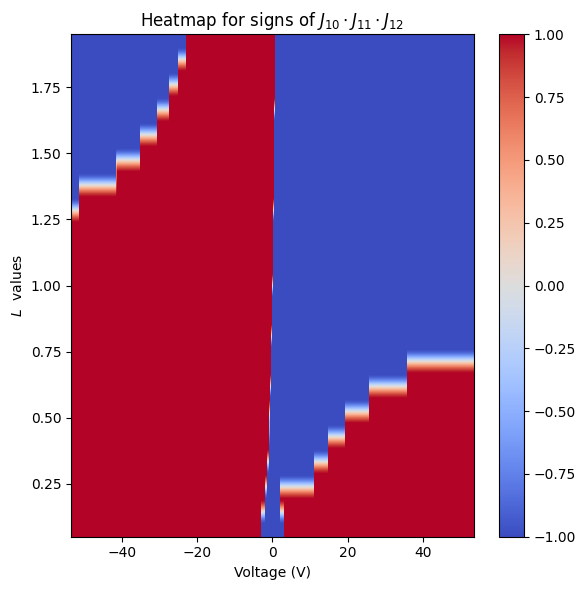

In [84]:
fig, ax = plt.subplots(figsize=(6, 6))  # Only one plot, so just one axis

# Plot the heatmap for signs_J1
img = ax.imshow(Jsign_func1, cmap='coolwarm', extent=[V_range[0], V_range[-1], L_values[-1], L_values[0]], aspect='auto', vmin=-1, vmax=1)
ax.set_xlabel('Voltage (V)')
ax.set_ylabel('$L~$ values')
ax.set_title(r'Heatmap for signs of $J_{10} \cdot J_{11} \cdot J_{12}$')
ax.set_xlim(min_V, max_V)
ax.set_ylim(L_values[0], L_values[-1])  # Reverse the y-axis

# Add legend
fig.colorbar(img, ax=ax)

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


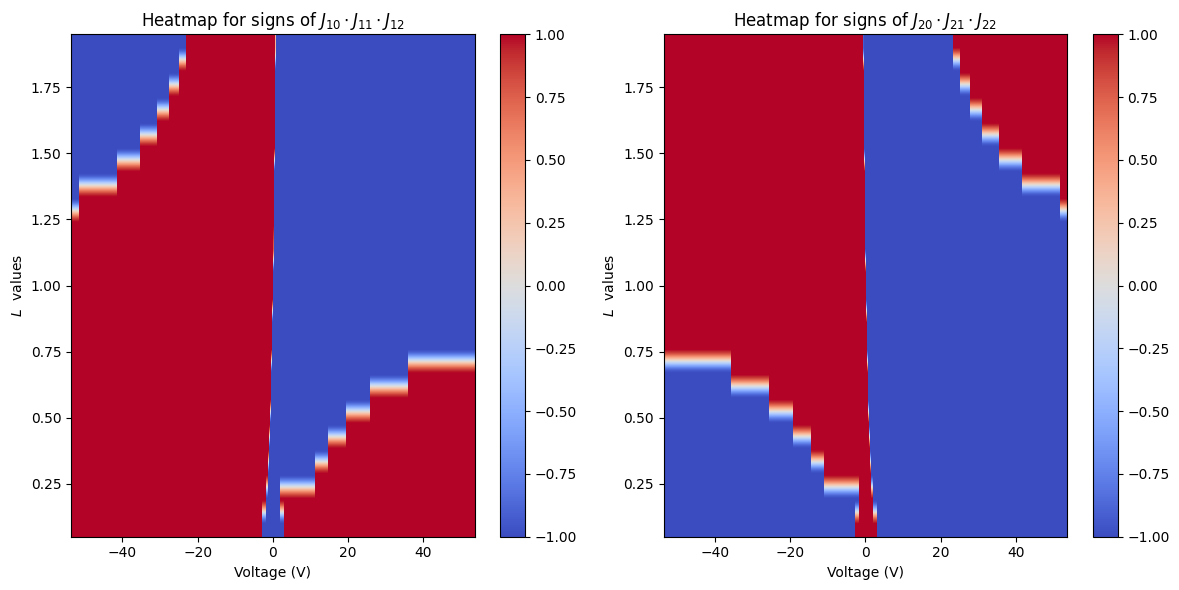

In [85]:
fig, axs = plt.subplots(1, 2, figsize=(12, 6))

# Plot the heatmap for signs_J1
img1 = axs[0].imshow(Jsign_func1, cmap='coolwarm', extent=[V_range[0], V_range[-1], L_values[-1], L_values[0]], aspect='auto', vmin=-1, vmax=1)
axs[0].set_xlabel('Voltage (V)')
axs[0].set_ylabel('$L~$ values')
axs[0].set_title(r'Heatmap for signs of $J_{10} \cdot J_{11} \cdot J_{12}$')
axs[0].set_xlim(min_V, max_V)
#axs[0].grid(True)
axs[0].set_ylim(L_values[0], L_values[-1])  # Reverse the y-axis

# Plot the heatmap for signs_J2
img2 = axs[1].imshow(Jsign_func2, cmap='coolwarm', extent=[V_range[0], V_range[-1], L_values[-1], L_values[0]], aspect='auto', vmin=-1, vmax=1)
axs[1].set_xlabel('Voltage (V)')
axs[1].set_ylabel('$L~$ values')
axs[1].set_title(r'Heatmap for signs of $J_{20} \cdot J_{21} \cdot J_{22}$')
axs[1].set_xlim(min_V, max_V)
#axs[1].grid(True)
axs[1].set_ylim(L_values[0], L_values[-1])  # Reverse the y-axis

# Add legends
fig.colorbar(img1, ax=axs[0])
fig.colorbar(img2, ax=axs[1])

# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [86]:
# Create a 3D matrix to store both signs_J1 and signs_J2
Jsign_matrix = np.zeros((2, lenL, len(V_range)))

# Define a list for both signs_J1 and signs_J2
sign_matrices = [signs_J1, signs_J2]

for idx, signs in enumerate(sign_matrices):
    for i in range(len(V_critic)):
        left_index = np.searchsorted(V_range, V_critic[i, 0])
        Jsign_matrix[idx, i, :left_index] = signs[i, 0]
        for j in range(len(V_critic[i]) - 1):
            if V_critic[i, j] == 0 and V_critic[i, j + 1] == 0:
                break
            # Find the indices corresponding to the current segment
            elif V_critic[i, j] != 0 and V_critic[i, j + 1] == 0:
                right_index = np.searchsorted(V_range, V_critic[i, j])
                Jsign_matrix[idx, i, right_index:] = signs[i, j + 1]

            else:
                start_index = np.searchsorted(V_range, V_critic[i, j])
                end_index = np.searchsorted(V_range, V_critic[i, j + 1])

                # Assign values from S to the corresponding segment in H
                Jsign_matrix[idx, i, start_index:end_index] = signs[i, j + 1]

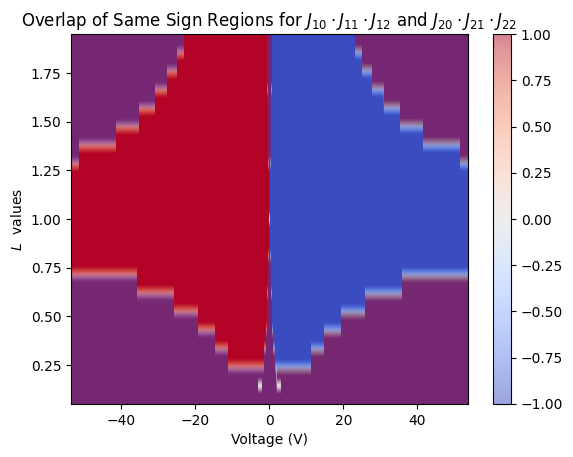

In [87]:
# Plot the heatmap with specified color scale limits for both signs_J1 and signs_J2
plt.imshow(Jsign_matrix[0, :, :], cmap='coolwarm', extent=[V_range[0], V_range[-1], L_values[-1], L_values[0]], aspect='auto', vmin=-1, vmax=1)
plt.imshow(Jsign_matrix[1, :, :], cmap='coolwarm', extent=[V_range[0], V_range[-1], L_values[-1], L_values[0]], aspect='auto', vmin=-1, vmax=1, alpha=0.5)  # Alpha blends the two heatmaps
plt.xlabel('Voltage (V)')
plt.ylabel('$L~$ values')
plt.title('Overlap of Same Sign Regions for $J_{10} \cdot J_{11} \cdot J_{12}$ and $J_{20} \cdot J_{21} \cdot J_{22}$')
plt.colorbar()

# Set x-axis limits
plt.xlim(min_V, max_V)
# Reverse the y-axis
plt.ylim(L_values[0], L_values[-1])



plt.show()